# The Hello World of Deep Learning with Neural Networks

Like every first app you should start with something super simple that shows the overall scaffolding for how your code works. 

In the case of creating neural networks, the sample I like to use is one where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules' — 


```
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

So how would you train a neural network to do the equivalent task? Using data! By feeding it with a set of Xs, and a set of Ys, it should be able to figure out the relationship between them. 

This is obviously a very different paradigm than what you might be used to, so let's step through it piece by piece.


## Imports

Let's start with our imports. Here we are importing TensorFlow and calling it tf for ease of use.

We then import a library called numpy, which helps us to represent our data as lists easily and quickly.

The framework for defining a neural network as a set of Sequential layers is called keras, so we import that too.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Define and Compile the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [0]:
model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[1]),
                             keras.layers.Dense(units=1, input_shape=[1])
                            ])

Now we compile our Neural Network. When we do so, we have to specify 2 functions, a loss and an optimizer.

If you've seen lots of math for machine learning, here's where it's usually used, but in this case it's nicely encapsulated in functions for you. But what happens here — let's explain...

We know that in our function, the relationship between the numbers is y=2x-1. 

When the computer is trying to 'learn' that, it makes a guess...maybe y=10x+10. The LOSS function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the OPTIMIZER function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like y=5x+5, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of EPOCHS which you will see shortly. But first, here's how we tell it to use 'MEAN SQUARED ERROR' for the loss and 'STOCHASTIC GRADIENT DESCENT' for the optimizer. You don't need to understand the math for these yet, but you can see that they work! :)

Over time you will learn the different and appropriate loss and optimizer functions for different scenarios. 


In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up we'll feed in some data. In this case we are taking 6 xs and 6ys. You can see that the relationship between these is that y=2x-1, so where x = -1, y=-3 etc. etc. 

A python library called 'Numpy' provides lots of array type data structures that are a defacto standard way of doing it. We declare that we want to use these by specifying the values as an np.array[]

In [0]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
rg = np.arange(len(xs))

In [0]:
import matplotlib.pyplot as plt

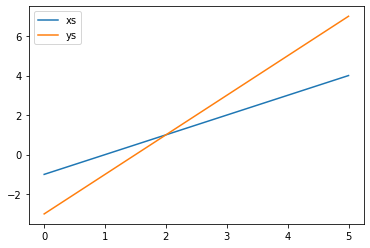

In [37]:
plt.plot(rg, xs, label='xs')
plt.plot(rg, ys, label='ys')
plt.legend()
plt.show()

# Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the Xs and Ys is in the **model.fit**  call. This is where it will go through the loop we spoke about above, making a guess, measuring how good or bad it is (aka the loss), using the opimizer to make another guess etc. It will do it for the number of epochs you specify. When you run this code, you'll see the loss on the right hand side.

In [28]:
model.fit(xs, ys, 
          epochs=500, 
          verbose=1)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 0s 553us/sample - loss: 1.4519e-12
Epoch 2/500
6/6 [==============================] - 0s 619us/sample - loss: 1.4519e-12
Epoch 3/500
6/6 [==============================] - 0s 436us/sample - loss: 1.4519e-12
Epoch 4/500
6/6 [==============================] - 0s 278us/sample - loss: 1.4519e-12
Epoch 5/500
6/6 [==============================] - 0s 478us/sample - loss: 1.4519e-12
Epoch 6/500
6/6 [==============================] - 0s 265us/sample - loss: 1.4519e-12
Epoch 7/500
6/6 [==============================] - 0s 297us/sample - loss: 1.4519e-12
Epoch 8/500
6/6 [==============================] - 0s 266us/sample - loss: 1.4519e-12
Epoch 9/500
6/6 [==============================] - 0s 201us/sample - loss: 1.4519e-12
Epoch 10/500
6/6 [==============================] - 0s 299us/sample - loss: 1.4519e-12
Epoch 11/500
6/6 [==============================] - 0s 274us/sample - loss: 1.4519e-12
Epoch 12/500
6/6 [===============

Ok, now you have a model that has been trained to learn the relationshop between X and Y. You can use the **model.predict** method to have it figure out the Y for a previously unknown X. So, for example, if X = 10, what do you think Y will be? Take a guess before you run this code:

In [29]:
print(model.predict([10.0]))

[[18.999994]]


You might have thought 19, right? But it ended up being a little under. Why do you think that is? 

Remember that neural networks deal with probabilities, so given the data that we fed the NN with, it calculated that there is a very high probability that the relationship between X and Y is Y=2X-1, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19. 

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.
